In [2]:
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns  
import pandas as pd

list = ['15', '25', '30', '40']
length = ['15 nt', '25 nt', '30 nt','40 nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0, median_dna, std_dna =[], [], []

for ll in list:
    name="/trajectories/gargi/RPA_Ed/end_to_end_"+ll+"_3_STACKS_1.txt"
    data = np.loadtxt(name)
    mask = np.isnan(data)
    data_n = data[~mask]
    dt=data_n/10
    me1=np.mean(dt)
    sd1=np.std(dt)
    median_dna.append(me1)
    std_dna.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('With Counterion', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(-1, 20)
    
#fig.savefig('distances_dna_withcn.png', dpi=300, bbox_inches='tight')

FileNotFoundError: /trajectories/gargi/end_to_end_15_3_STACKS_1.txt not found.

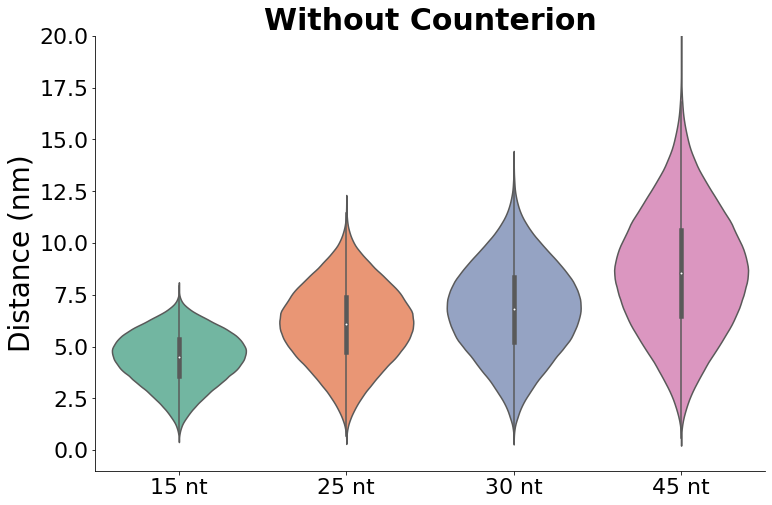

In [50]:
list = ['15', '25', '30', '45']
length = ['15 nt', '25 nt', '30 nt','45 nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0=[]
med_N=[]
sdv_N=[]
for ll in list:
    name="all_e_to_e_DNA_"+ll+"_0_N.txt"
    data = np.loadtxt(name)
    dt=data/10
    me1=np.mean(dt)
    sd1=np.std(dt)
    med_N.append(me1)
    sdv_N.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('Without Counterion', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(-1, 20)
fig.savefig('distances_dna_withoutcn.png', dpi=300, bbox_inches='tight')


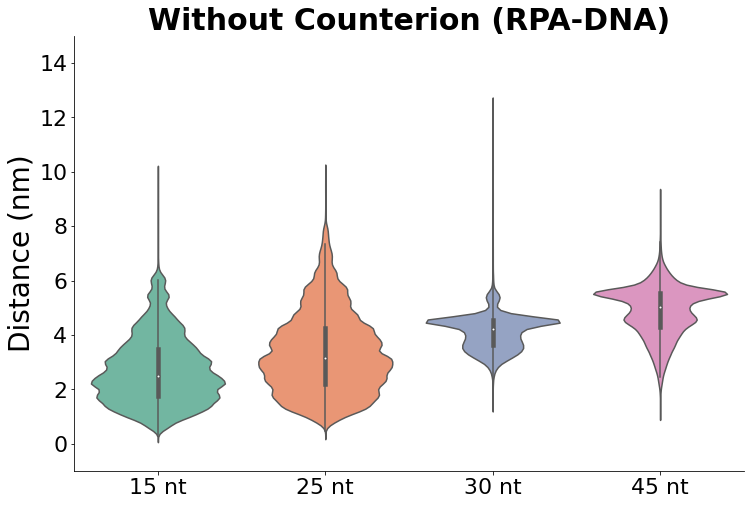

In [89]:
list = ['15', '25', '30', '45']
length = ['15 nt', '25 nt', '30 nt','45 nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0=[]
med_NR=[]
sdv_NR=[]
for ll in list:
    name="all_e_to_e_RPA.DNA_"+ll+"_0.txt"
    data = np.loadtxt(name)
    dt=data/10
    if int(ll) <= 25:
        mask = dt <= 10
        dt = dt[mask]
    me1=np.mean(dt)
    sd1=np.std(dt)
    med_NR.append(me1)
    sdv_NR.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('Without Counterion (RPA-DNA)', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(-1, 15)
fig.savefig('distances_dna_withoutcn_RPA.png', dpi=300, bbox_inches='tight')

[4.2604984025000014, 5.929998070700001, 6.605993584699998, 8.415215784875004] [4.4314247278000005, 6.052487148899997, 6.7862521924, 8.5728046238]


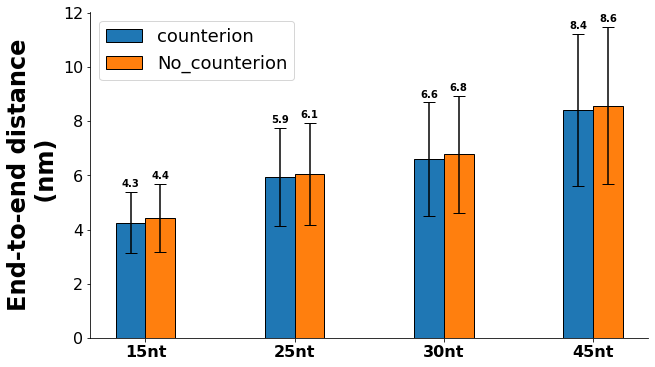

In [90]:
print(med, med_N)
ion_type = ("15nt", "25nt", "30nt", "45nt")
mean_ads = {
    'counterion': tuple(med),
    'No_counterion': tuple(med_N),
    }
err_ads = {
    'counterion': tuple(sdv),
    'No_counterion': tuple(sdv_N),
    }
x = np.array([0, 1, 2, 3])
fig, ax = plt.subplots(figsize=(10,6))
width = 0.2  # the width of the bars
multiplier = 0
name1, name2 =mean_ads.items()
#print(name1, name2)
group1 = ['#80c0c0', 'teal', 'red', 'green'] 
group2 = ['#a0b4f0', 'royalblue', 'orange', 'cyan']
for (attribute, measurement), (att1, meas1) in zip(mean_ads.items(), err_ads.items()):
    offset = width * multiplier
    rects = ax.bar(x+offset-0.1, measurement, width, label=attribute, yerr= meas1, capsize=6, edgecolor='black')
    ax.bar_label(rects, fmt='%3.1f', padding=3, fontweight='bold')
    multiplier += 1
ax.set_xticks(x+offset-0.2, ion_type, fontweight='bold', fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
#ax.set_title('Radius of gyration', fontsize=30, fontweight='bold')
#ax.set_ylabel("Radius of gyration \n[Rg] (nm)", fontsize=28, fontweight='bold')
spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.set_ylabel('End-to-end distance\n (nm)', fontsize=24, fontweight='bold')
fig.savefig('compare_end_to_end_counterions.png', dpi=300, bbox_inches='tight')

[4.2604984025000014, 5.929998070700001, 6.605993584699998, 8.415215784875004] [4.4314247278000005, 6.052487148899997, 6.7862521924, 8.5728046238]


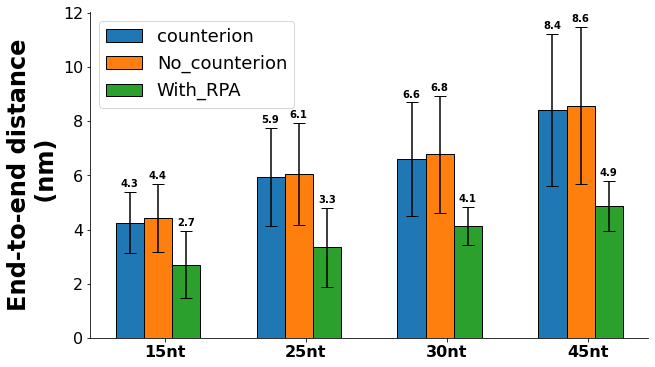

In [91]:
print(med, med_N)
ion_type = ("15nt", "25nt", "30nt", "45nt")
mean_ads = {
    'counterion': tuple(med),
    'No_counterion': tuple(med_N),
    'With_RPA': tuple(med_NR)
    }
err_ads = {
    'counterion': tuple(sdv),
    'No_counterion': tuple(sdv_N),
    'With_RPA': tuple(sdv_NR)
    }
x = np.array([0, 1, 2, 3])
fig, ax = plt.subplots(figsize=(10,6))
width = 0.2  # the width of the bars
multiplier = 0

group1 = ['#80c0c0', 'teal', 'red', 'green'] 
group2 = ['#a0b4f0', 'royalblue', 'orange', 'cyan']
for (attribute, measurement), (att1, meas1) in zip(mean_ads.items(), err_ads.items()):
    offset = width * multiplier
    rects = ax.bar(x+offset, measurement, width, label=attribute, yerr= meas1, capsize=6, edgecolor='black')
    ax.bar_label(rects, fmt='%3.1f', padding=3, fontweight='bold')
    multiplier += 1
ax.set_xticks(x+0.25, ion_type, fontweight='bold', fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
#ax.set_title('Radius of gyration', fontsize=30, fontweight='bold')
#ax.set_ylabel("Radius of gyration \n[Rg] (nm)", fontsize=28, fontweight='bold')
spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.set_ylabel('End-to-end distance\n (nm)', fontsize=24, fontweight='bold')
#fig.savefig('compare_end_to_end_counterions.png', dpi=300, bbox_inches='tight')
fig.savefig('compare_end_to_end_counterions_RPA.png', dpi=300, bbox_inches='tight')

[4.2604984025000014, 5.929998070700001, 6.605993584699998, 8.415215784875004]
[4.4314247278000005, 6.052487148899997, 6.7862521924, 8.5728046238]
[2.7052045605665613, 3.3383447402309527, 4.130969633384616, 4.886081786555556]


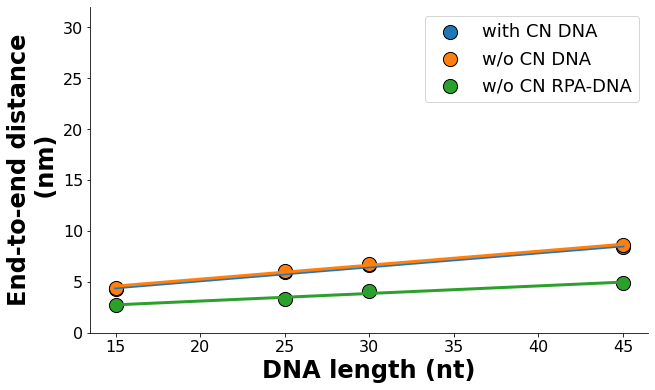

In [95]:
from scipy.optimize import curve_fit

x = np.array([15.0, 25.0, 30.0, 45.0])

# Define your exponential function
def exponential_func(x, a, b):
    return a * x + b
fig, ax = plt.subplots(figsize=(10, 6))
list = [med, med_N, med_NR]
lab = ['with CN DNA', 'w/o CN DNA', 'w/o CN RPA-DNA']
color = ['tab:blue', 'tab:orange', 'tab:green']
count = 0
for item in list:
    print(item)    
    ax.scatter(x, item, s=200, edgecolor='black', color = color[count], label=lab[count])
    params, covar = curve_fit(exponential_func, x, item, maxfev=50000)
    a_fit, b_fit = params
    y_fit = exponential_func(x, a_fit, b_fit)
    ax.plot(x, y_fit, color=color[count], linewidth=3)
    count = count + 1
ax.legend(fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
#ax.set_title('Radius of gyration', fontsize=30, fontweight='bold')
#ax.set_ylabel("Radius of gyration \n[Rg] (nm)", fontsize=28, fontweight='bold')
spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.set_ylabel('End-to-end distance\n (nm)', fontsize=24, fontweight='bold')
ax.set_xlabel('DNA length (nt)', fontsize=24, fontweight='bold')
#fig.savefig()
#fig.savefig()
ax.set_ylim(0,32)
fig.savefig('compare_end_to_end_counterions_RPA_scatter.png', dpi=300, bbox_inches='tight')

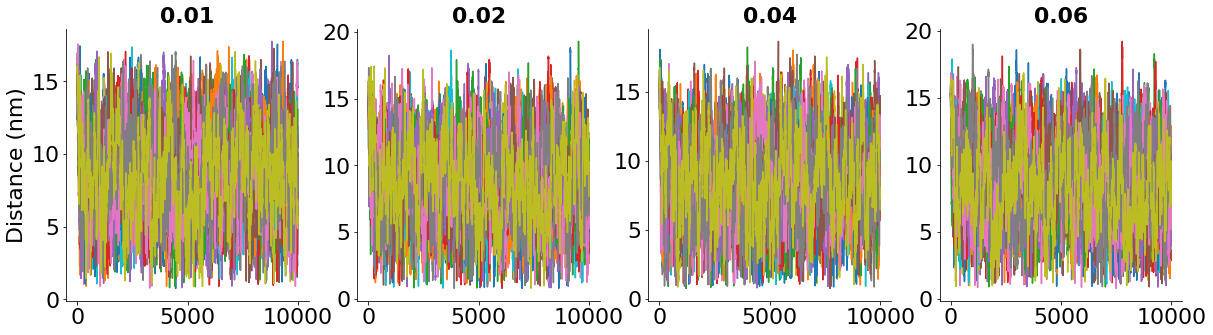

In [9]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
num = [0.01, 0.02, 0.04, 0.06]
count = 0
for item in num:
    name='DNA_45_0_'+str(item)
    folder=name+'/output/Traj/'
    for j in range(1,20):
        name1=folder+'end_dis_'+str(j)+'.txt'
        data = np.loadtxt(name1)
        x = data[:,0]
        y = data[:,1]
        ax[count].plot(x,y/10)
    ax[count].set_title(item, fontsize=22, fontweight='bold')
    count = count + 1
    
for axp in ax:
    axp.xaxis.tick_bottom()
    axp.yaxis.tick_left()
    axp.tick_params(axis='both', which='major', labelsize=22)

    spines_to_keep = ['bottom', 'left']
    spines_to_remove = ['top', 'right']

    for spine in spines_to_remove:
        axp.spines[spine].set_visible(False)
ax[0].set_ylabel('Distance (nm)', fontsize=22)
fig.savefig('salt_dep_time.png', dpi=300, bbox_inches='tight')
        

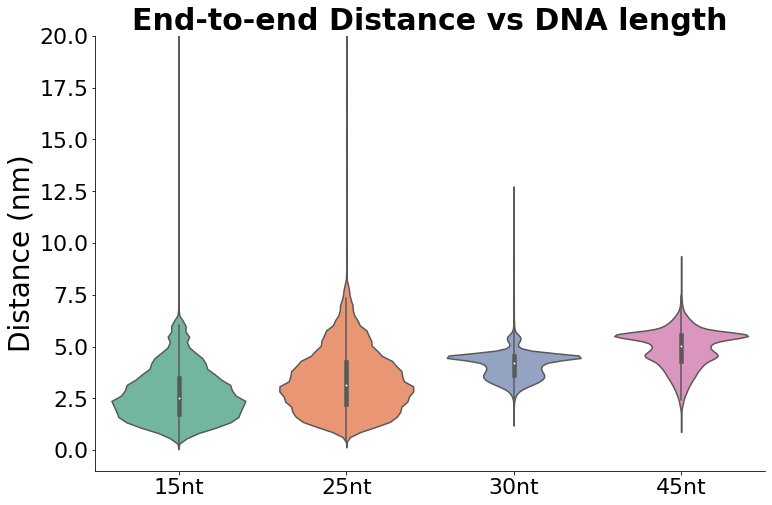

In [62]:
list = ['15', '25', '30', '45']
length = ['15nt', '25nt', '30nt','45nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0=[]
med_p0=[]
sdv_p0=[]
for ll in list:
    name="all_e_to_e_"+ll+"_RPA.DNA_0.txt"
    data = np.loadtxt(name)
    dt=data/10
    me1=np.median(dt)
    sd1=np.std(dt)
    med_p0.append(me1)
    sdv_p0.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('End-to-end Distance vs DNA length', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(-1, 20)
fig.savefig('distances_dna_rpa0.png', dpi=300, bbox_inches='tight')

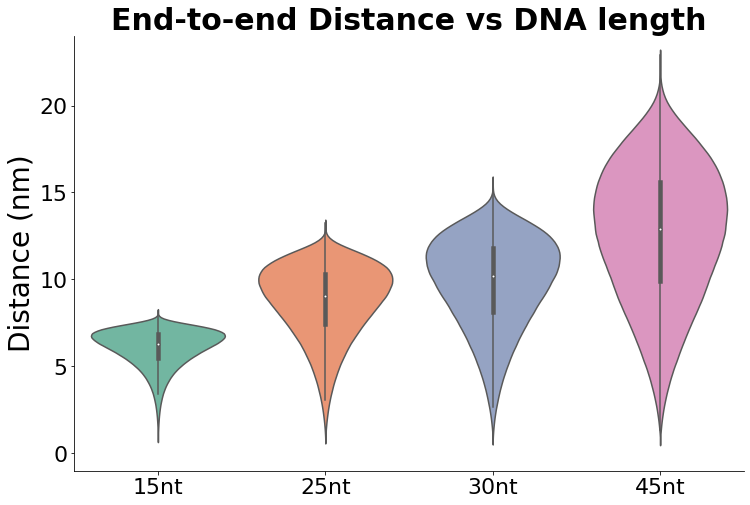

In [38]:
list = ['15', '25', '30', '45']
length = ['15nt', '25nt', '30nt','45nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0=[]
med_dna=[]
sdv_dna=[]
for ll in list:
    name="all_e_to_e_"+ll+"_DNA.txt"
    data = np.loadtxt(name)
    dt=data/10
    me1=np.median(dt)
    sd1=np.std(dt)
    med_dna.append(me1)
    sdv_dna.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('End-to-end Distance vs DNA length', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(-1, 24)
fig.savefig('distances_dna.png', dpi=300, bbox_inches='tight')    

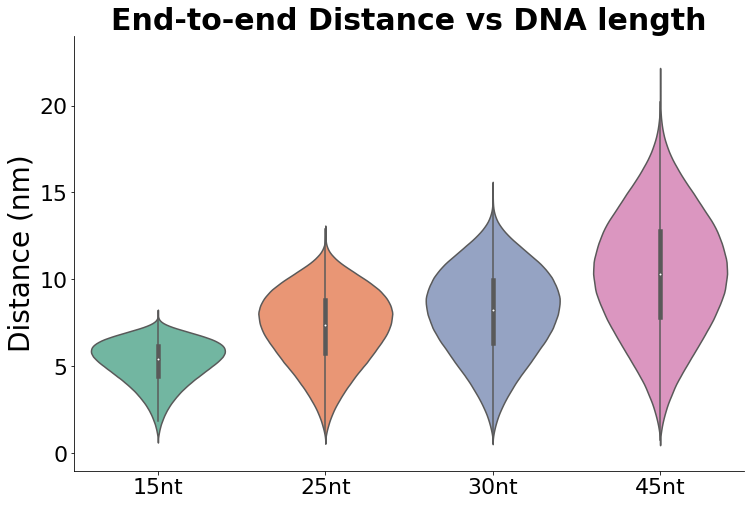

In [47]:
list = ['15', '25', '30', '45']
length = ['15nt', '25nt', '30nt','45nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0=[]
med_dna3=[]
sdv_dna3=[]
for ll in list:
    name="all_e_to_e_"+ll+"_DNA3.txt"
    data = np.loadtxt(name)
    dt=data/10
    me1=np.median(dt)
    sd1=np.std(dt)
    med_dna3.append(me1)
    sdv_dna3.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('End-to-end Distance vs DNA length', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(-1, 24)
fig.savefig('violin_ssdna_3.png', dpi=300, bbox_inches='tight')

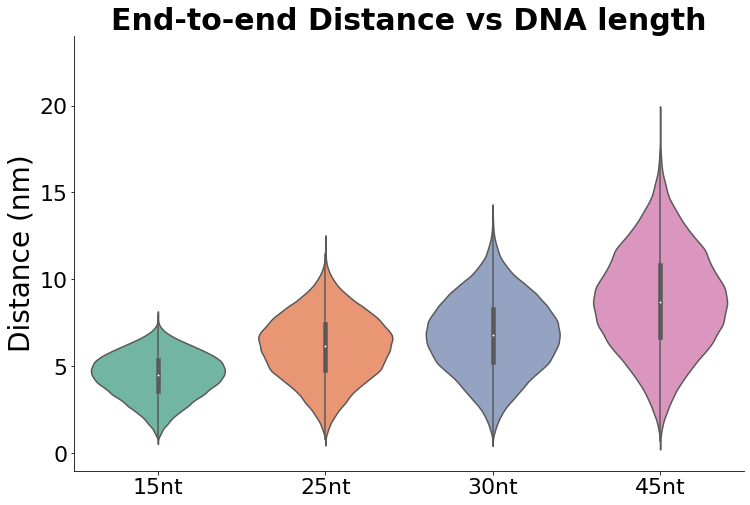

In [54]:
list = ['15', '25', '30', '45']
length = ['15nt', '25nt', '30nt','45nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0=[]
med_dna0=[]
sdv_dna0=[]
for ll in list:
    name="all_e_to_e_"+ll+"_DNA0.txt"
    data = np.loadtxt(name)
    dt=data/10
    me1=np.median(dt)
    sd1=np.std(dt)
    med_dna0.append(me1)
    sdv_dna0.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('End-to-end Distance vs DNA length', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(-1, 24)
fig.savefig('violin_ssdna_0.png', dpi=300, bbox_inches='tight')

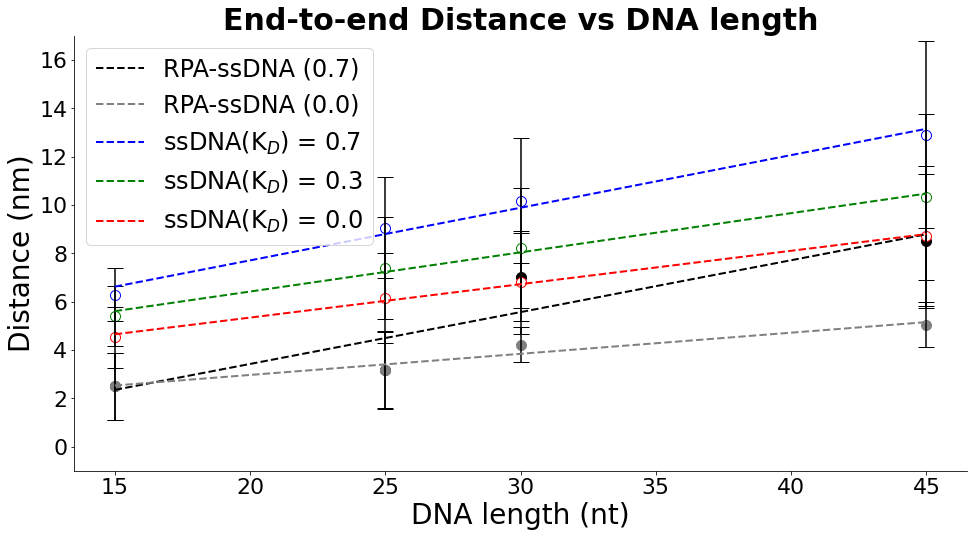

In [61]:
from scipy.optimize import curve_fit
len_list = [15, 25, 30, 45]
fig, ax = plt.subplots(figsize=(16,8))
def linear_func(x, m, c):
    return m * x + c
plt.errorbar(len_list, med, yerr=sdv, fmt='none', capsize=8, color='black')
plt.scatter(len_list, med, color='black', s=100)

plt.errorbar(len_list, med_p0, yerr=sdv_p0, fmt='none', capsize=8, color='black')
plt.scatter(len_list, med_p0, color='gray', s=100)

plt.errorbar(len_list, med_dna3, yerr=sdv_dna3, fmt='none', capsize=8, color='black')
plt.scatter(len_list, med_dna3, edgecolor='green', s=100, facecolor='white')
plt.scatter(len_list, med_dna, edgecolor='blue', s=100, facecolor='white')
plt.errorbar(len_list, med_dna, yerr=sdv_dna, fmt='none', capsize=8, color='black')
plt.scatter(len_list, med_dna0, edgecolor='red', s=100, facecolor='white')
plt.errorbar(len_list, med_dna0, yerr=sdv_dna0, fmt='none', capsize=8, color='black')

popt, pcov = curve_fit(linear_func, len_list, med)
slope, intercept = popt

popt0, pcov0 = curve_fit(linear_func, len_list, med_p0)
slope0, intercept0 = popt0

popt1, pcov1 = curve_fit(linear_func, len_list, med_dna3)
slope1, intercept1 = popt1

popt2, pcov2 = curve_fit(linear_func, len_list, med_dna)
slope2, intercept2 = popt2

popt3, pcov3 = curve_fit(linear_func, len_list, med_dna0)
slope3, intercept3 = popt3


y_val = []
for item in len_list:
    y1 = linear_func(item, slope, intercept)
    y_val.append(y1)
y_val = np.array(y_val)

y_val0 = []
for item in len_list:
    y0 = linear_func(item, slope0, intercept0)
    y_val0.append(y0)
y_val0 = np.array(y_val0)

y_val1 = []
for item in len_list:
    y11 = linear_func(item, slope1, intercept1)
    y_val1.append(y11)
y_val1 = np.array(y_val1)

y_val2 = []
for item in len_list:
    y22 = linear_func(item, slope2, intercept2)
    y_val2.append(y22)
y_val2 = np.array(y_val2)

y_val3 = []
for item in len_list:
    y33 = linear_func(item, slope3, intercept3)
    y_val3.append(y33)
y_val3 = np.array(y_val3)


plt.plot(len_list, y_val, color='black', label='RPA-ssDNA (0.7)', linewidth=2, linestyle='dashed')
plt.plot(len_list, y_val0, color='gray', label='RPA-ssDNA (0.0)', linewidth=2, linestyle='dashed')
plt.plot(len_list, y_val2, color='blue', label='ssDNA(K$_{D}$) = 0.7', linewidth=2, linestyle='dashed')
plt.plot(len_list, y_val1, color='green', label='ssDNA(K$_{D}$) = 0.3', linewidth=2, linestyle='dashed')
plt.plot(len_list, y_val3, color='red', label='ssDNA(K$_{D}$) = 0.0', linewidth=2, linestyle='dashed')
ax.set_ylabel('Distance (nm)', fontsize=28)
ax.set_xlabel('DNA length (nt)', fontsize=28)

ax.set_title('End-to-end Distance vs DNA length', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.legend(fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']
ax.set_ylim(-1, 17)
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
fig.savefig('scatterplot_all.png', dpi=300, bbox_inches='tight')

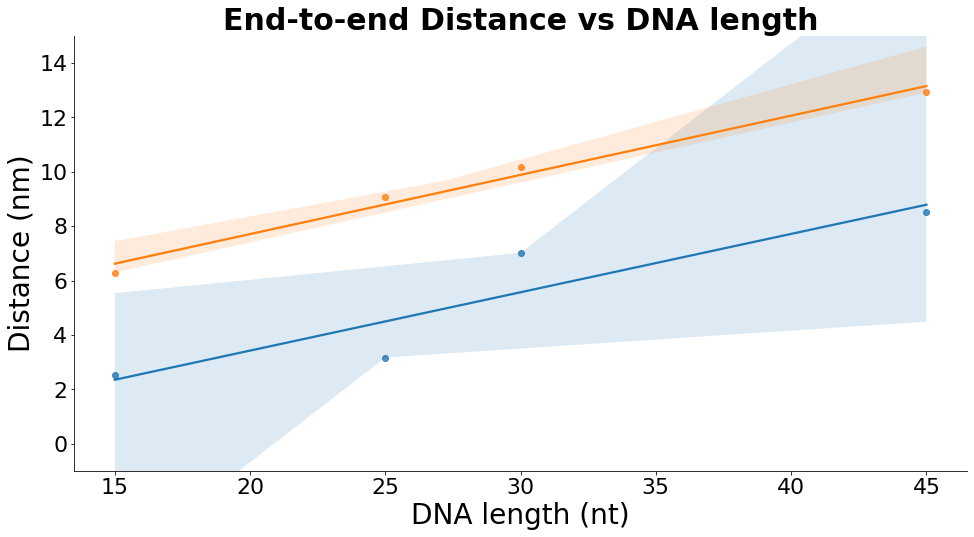

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
sns.regplot(x=len_list, y=med, ax=ax)
sns.regplot(x=len_list, y=med_dna, ax=ax) 
ax.set_ylabel('Distance (nm)', fontsize=28)
ax.set_xlabel('DNA length (nt)', fontsize=28)

ax.set_title('End-to-end Distance vs DNA length', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']
ax.set_ylim(-1, 15)
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
fig.savefig('regplot_dnalen.png', dpi=300, bbox_inches='tight')

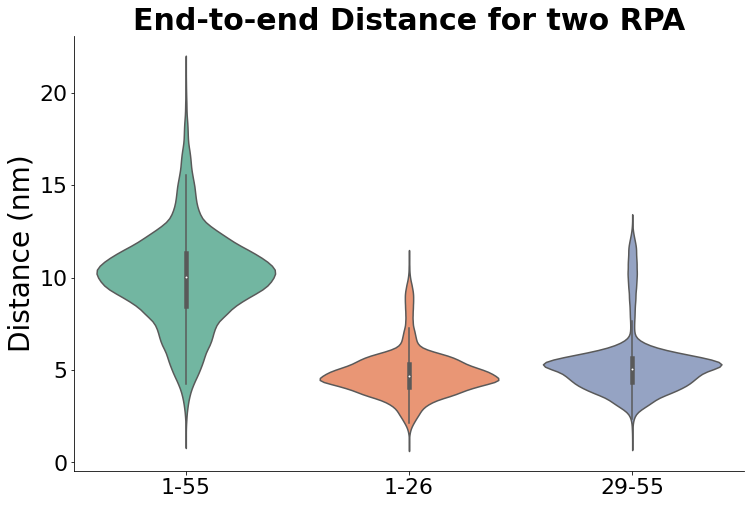

In [32]:
list = ['TWO.RPA', 'TWO.RPA1', 'TWO.RPA2']
length = ['1-55', '1-26', '29-55']

xtick_pos = np.array([0, 1, 2])
cmap = sns.color_palette("Set2")

data0=[]
med_two=[]
sdv_two=[]
for ll in list:
    name="all_e_to_e_"+ll+".txt"
    data = np.loadtxt(name)
    dt=data/10
    me1=np.median(dt)
    sd1=np.std(dt)
    med_two.append(me1)
    sdv_two.append(sd1)
    data0.append(dt)
    
fig, ax = plt.subplots(figsize=(12,8))
    
sns.violinplot(data=data0, width=0.8, ax=ax, palette=cmap, split=True, scale="width")
ax.set_xticks(xtick_pos, length, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('End-to-end Distance for two RPA', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
fig.savefig('two_RPA_violin.png', dpi=300, bbox_inches='tight')

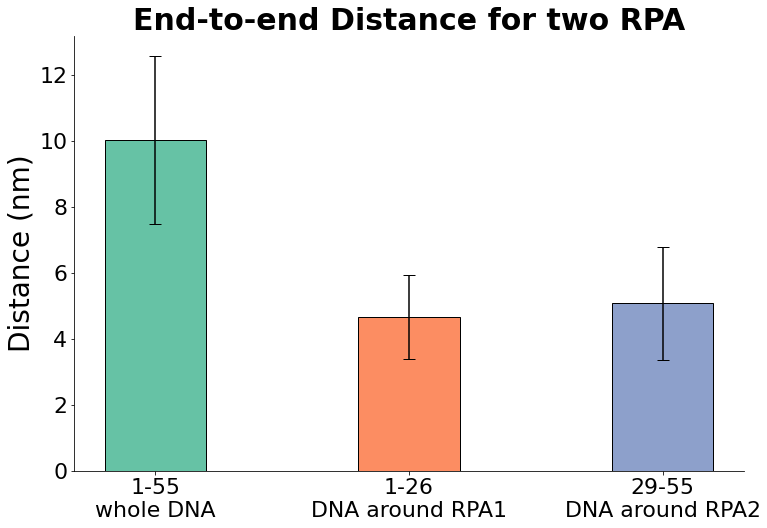

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
nw_len = ['1-55\nwhole DNA', '1-26\nDNA around RPA1', '29-55\nDNA around RPA2']

cmap = sns.color_palette("Set2")
    
ax.bar(x=[0,1,2], height=med_two, width=0.4, yerr=sdv_two, capsize=6, color=cmap, edgecolor='black')
ax.set_xticks(xtick_pos, nw_len, fontsize=24)
ax.set_ylabel('Distance (nm)', fontsize=28)

ax.set_title('End-to-end Distance for two RPA', fontsize=30, fontweight='bold')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    
fig.savefig('two_RPA_bar.png', dpi=300, bbox_inches='tight')